<a href="https://colab.research.google.com/github/usmantakai/ai-renewable-energy-projects/blob/main/Added%20improved%20model%20with%20train/test%20split%20and%20Random%20Forest%20for%20non-linear%20solar%20energy%20forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
print("Libraries loaded successfully")

Libraries loaded successfully


In [ ]:
import numpy as np
import pandas as pd
np.random.seed(0)
hours = 200
power = np.abs(
    np.sin(np.linspace(0, 10, hours)) * 50
    + np.random.randn(hours) * 5
)
data = pd.DataFrame({"power": power})
data["lag_1"] = data["power"].shift(1)
data = data.dropna()
data.head()

,power,lag_1
1,4.512292,8.820262
2,9.910360,4.512292
3,18.713636,9.910360
4,19.320501,18.713636
5,7.544660,19.320501


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
# Features and target
x = data[["lag_1"]]
y = data["power"]
# Train model
model = LinearRegression()
model.fit(x, y)
# Predictions
predictions = model.predict(x)
# Evalution
mae = mean_absolute_error(y, predictions)
mae

5.659183749525993

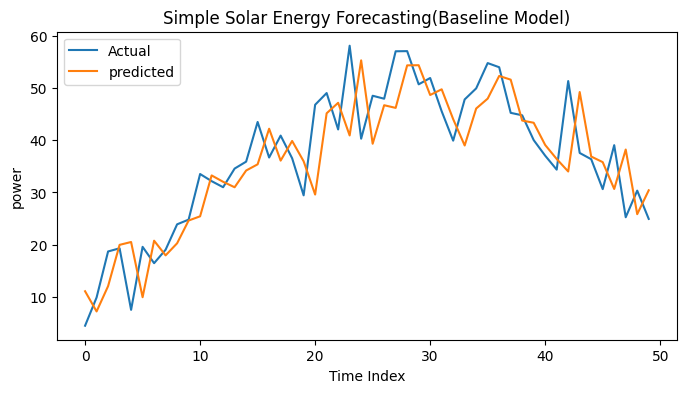

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.plot(y.values[:50], label="Actual")
plt.plot(predictions[:50], label="predicted")
plt.legend()
plt.title("Simple Solar Energy Forecasting(Baseline Model)")
plt.xlabel("Time Index")
plt.ylabel("power")
plt.show()

In [2]:
import numpy as np
import pandas as pd
np.random.seed(0)
hours = 200
power = np.abs(
    np.sin(np.linspace(0, 10, hours)) * 5
)
data = pd.DataFrame({"power": power})
data["lag_1"] = data["power"].shift(1)
data = data.dropna()
data.head()

,power,lag_1
1,0.251151,0.000000
2,0.501667,0.251151
3,0.750917,0.501667
4,0.998271,0.750917
5,1.243105,0.998271


In [3]:
from sklearn.model_selection import train_test_split
x = data[["lag_1"]]
y = data["power"]
x_train, x_test,y_train, y_test = train_test_split(
    x, y, test_size=0.2, shuffle=False
)
len(x_train), len(x_test)

(159, 40)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
# Train model
model = LinearRegression()
model.fit(x_train, y_train)
# Predictions
y_pred = model.predict(x_test)
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae, rmse

(0.19387659281703123, np.float64(0.20803504766611441))

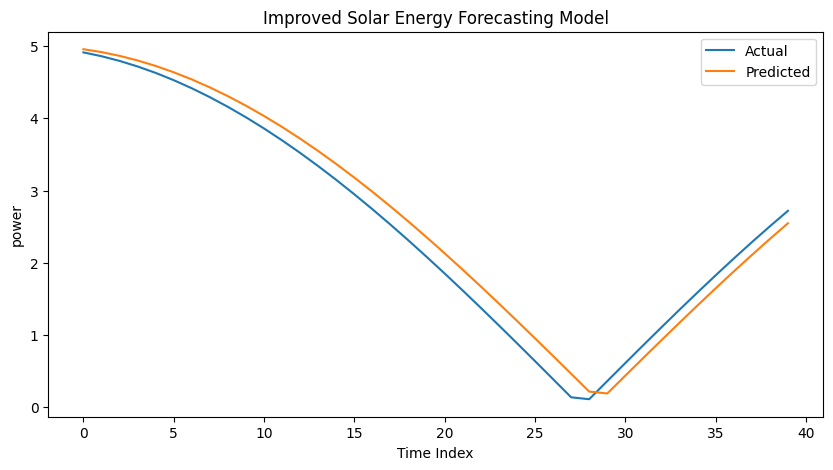

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.title("Improved Solar Energy Forecasting Model")
plt.xlabel("Time Index")
plt.ylabel("power")
plt.legend()
plt.show()

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [8]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42
)
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [9]:
rf_pred = rf_model.predict(x_test)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_mae, rf_rmse

(0.12564944715751172, np.float64(0.1342981593355222))

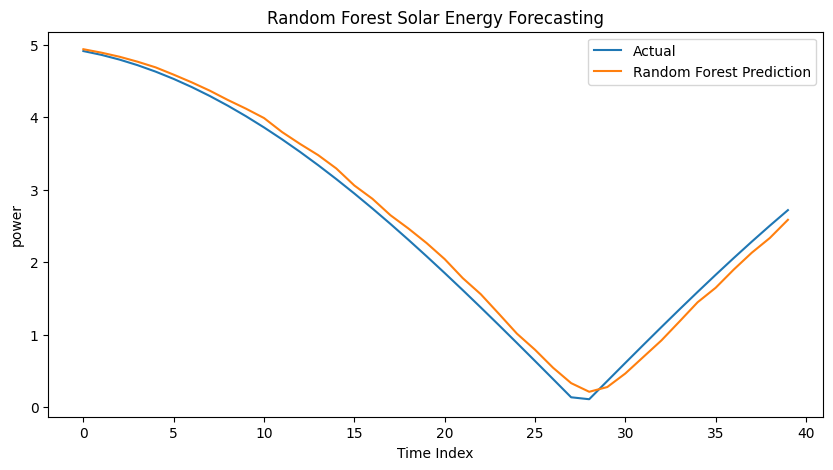

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual")
plt.plot(rf_pred, label="Random Forest Prediction")
plt.title("Random Forest Solar Energy Forecasting")
plt.xlabel("Time Index")
plt.ylabel("power")
plt.legend()
plt.show()